In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme()

In [2]:
df = pd.read_csv('jobs_in_data.csv')


In [3]:
df.head(5)

work_year             job_title                    job_category  \
0       2023  Data DevOps Engineer                Data Engineering   
1       2023        Data Architect  Data Architecture and Modeling   
2       2023        Data Architect  Data Architecture and Modeling   
3       2023        Data Scientist       Data Science and Research   
4       2023        Data Scientist       Data Science and Research   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR   88000          95012            Germany        Mid-level   
1             USD  186000         186000      United States           Senior   
2             USD   81800          81800      United States           Senior   
3             USD  212000         212000      United States           Senior   
4             USD   93300          93300      United States           Senior   

  employment_type work_setting company_location company_size  
0       Full-time       Hybrid          Germany            L  
1       Full-time    In-person    United States            M  
2       Full-time    In-person    United States            M  
3       Full-time    In-person    United States            M  
4       Full-time    In-person    United States            M

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
df.describe()

work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   63608.835387   63177.372024
min    2020.000000   14000.000000   15000.000000
25%    2023.000000  105200.000000  105700.000000
50%    2023.000000  143860.000000  143000.000000
75%    2023.000000  187000.000000  186723.000000
max    2023.000000  450000.000000  450000.000000

In [6]:
df.corr(numeric_only=True)

work_year    salary  salary_in_usd
work_year       1.000000  0.160708       0.166003
salary          0.160708  1.000000       0.991309
salary_in_usd   0.166003  0.991309       1.000000

In [7]:
df.kurtosis(numeric_only=True)

work_year        6.673980
salary           0.470611
salary_in_usd    0.567242
dtype: float64

In [8]:
df.skew(numeric_only=True)

work_year       -2.429083
salary           0.579149
salary_in_usd    0.621291
dtype: float64

<Axes: xlabel='salary_in_usd', ylabel='Count'>

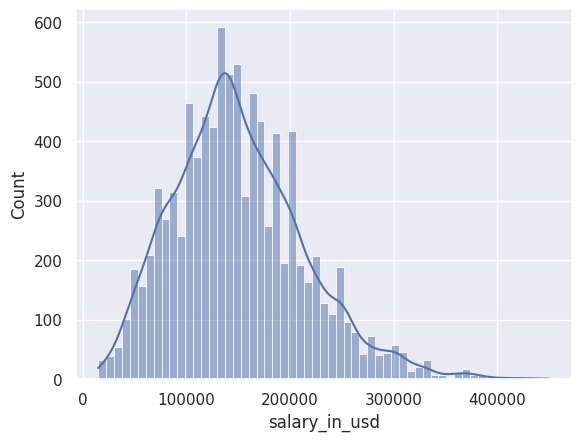

In [39]:
sns.histplot(data=df, x="salary_in_usd", kde=True)

Here we have a histogram of the salary variable (expressed in USD), along with a curve showing an estimation of the probability density function (obtained through a technique called kernel density estimation). The peak on the left side corresponds to the positive skewness vale we saw above (approximately 0.62). The kurtosis value of approximately 0.57 is rather low and it corresponds to a low frequency of outliers.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


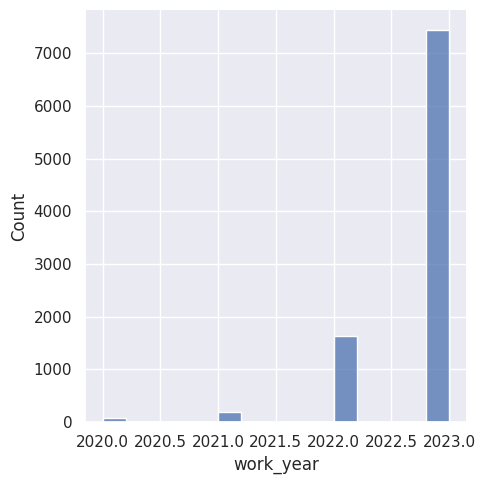

In [9]:
g = sns.displot(df.work_year)


We can see that the most of the data in this set pertains to 2023, rather than previous years.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


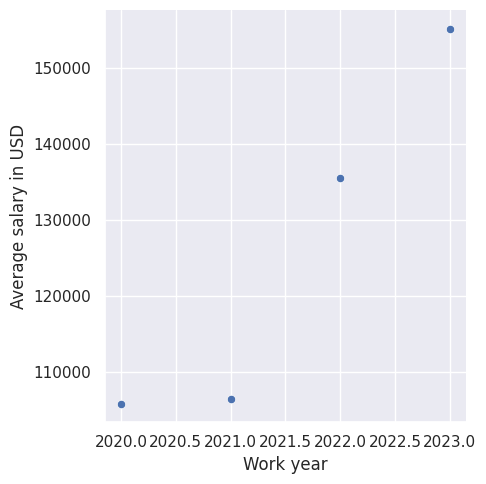

In [10]:
g= sns.relplot(x='work_year', y='salary_in_usd',data=df.groupby('work_year')["salary_in_usd"].mean().reset_index())
g.set_axis_labels("Work year", "Average salary in USD")

We can see a significant increase in average salary from 2020 to 2023. 2020 and 2021 show comparable values, then we see a sharp increase in 2022 that continues into 2023

In [11]:
df1= df.groupby('work_year')["salary_in_usd"].mean().reset_index()
print(df1)

   work_year  salary_in_usd
0       2020  105878.859155
1       2021  106483.644670
2       2022  135467.501836
3       2023  155132.591708


/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


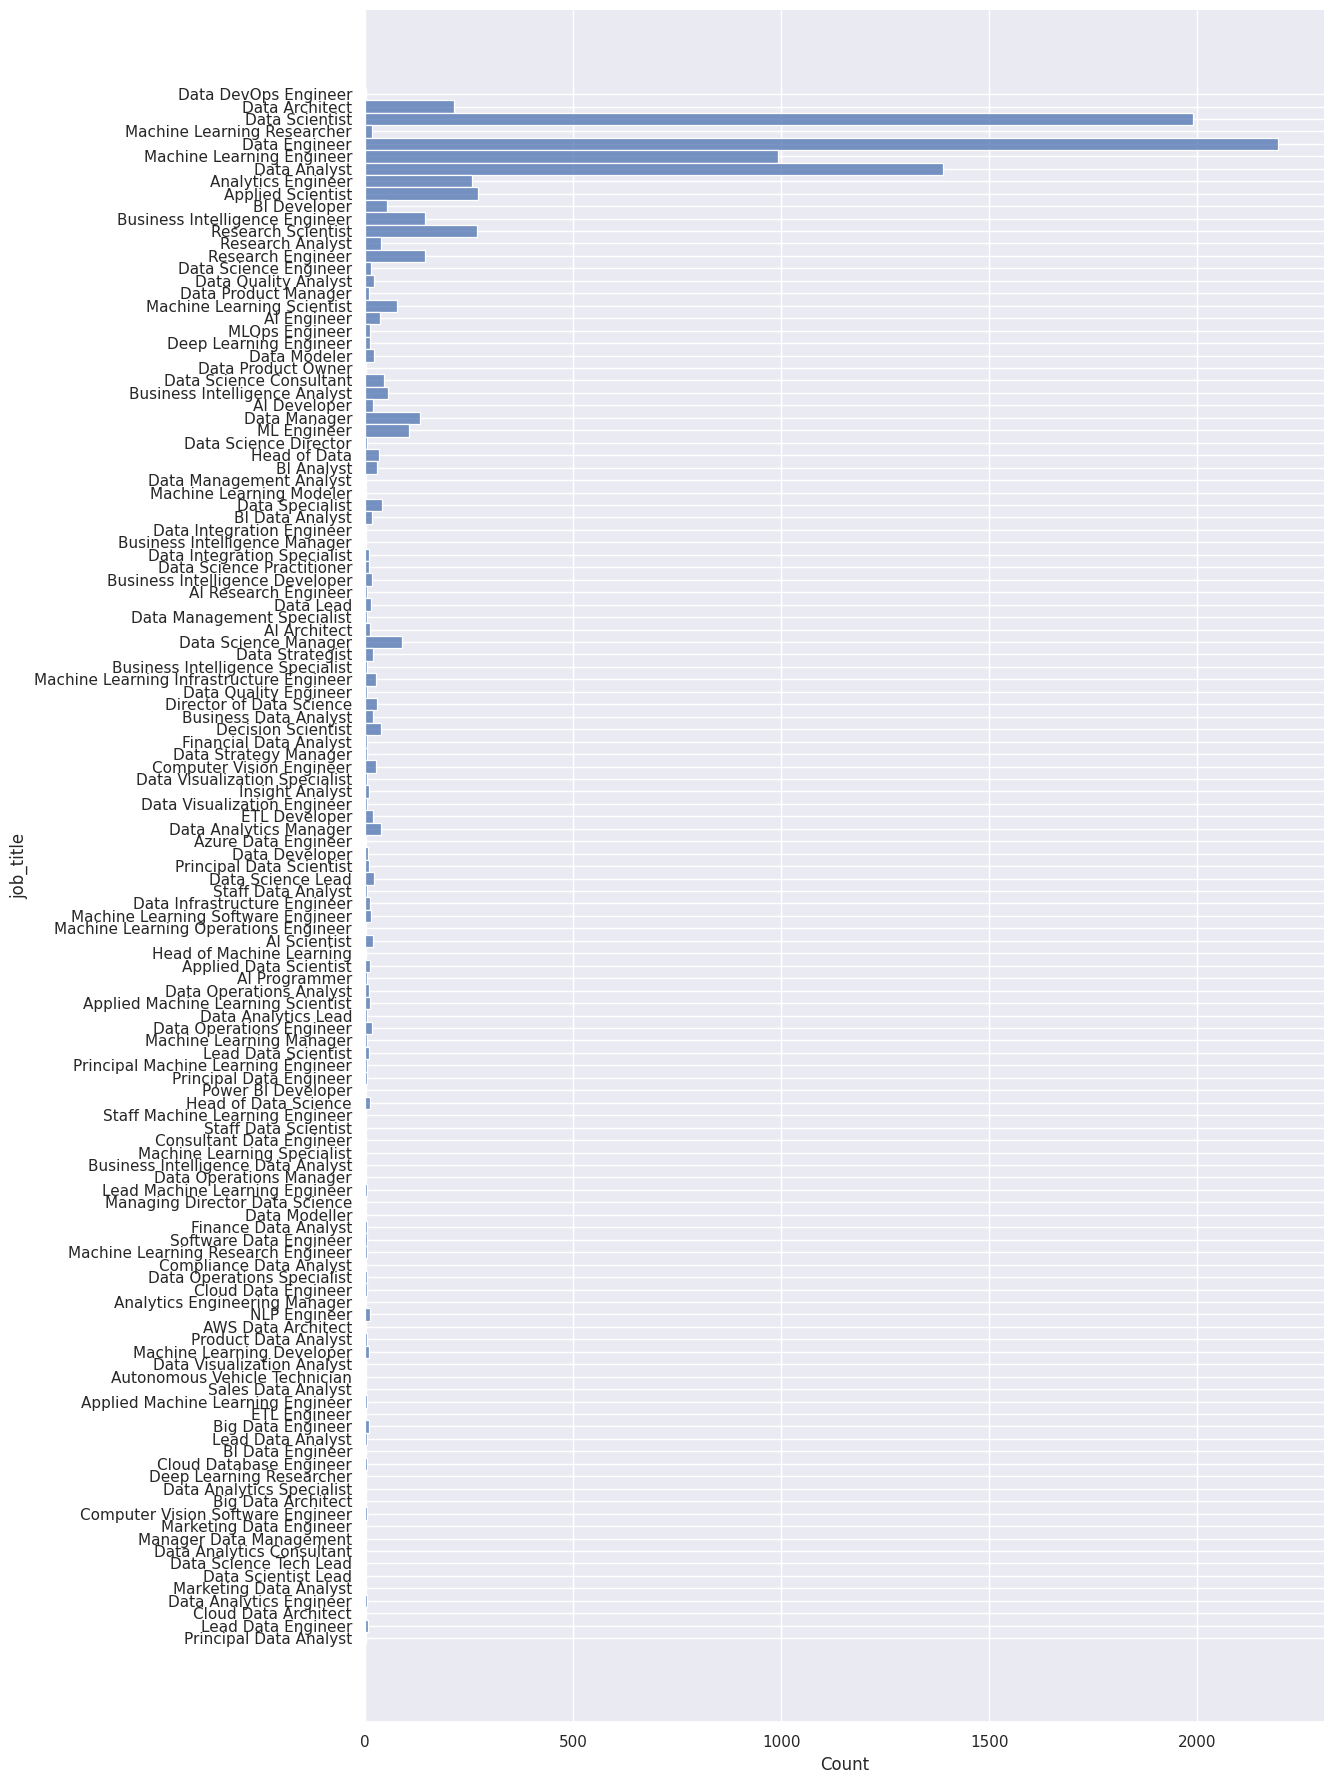

In [12]:
g=sns.displot(y='job_title', data =df, height = 18, aspect=0.75)

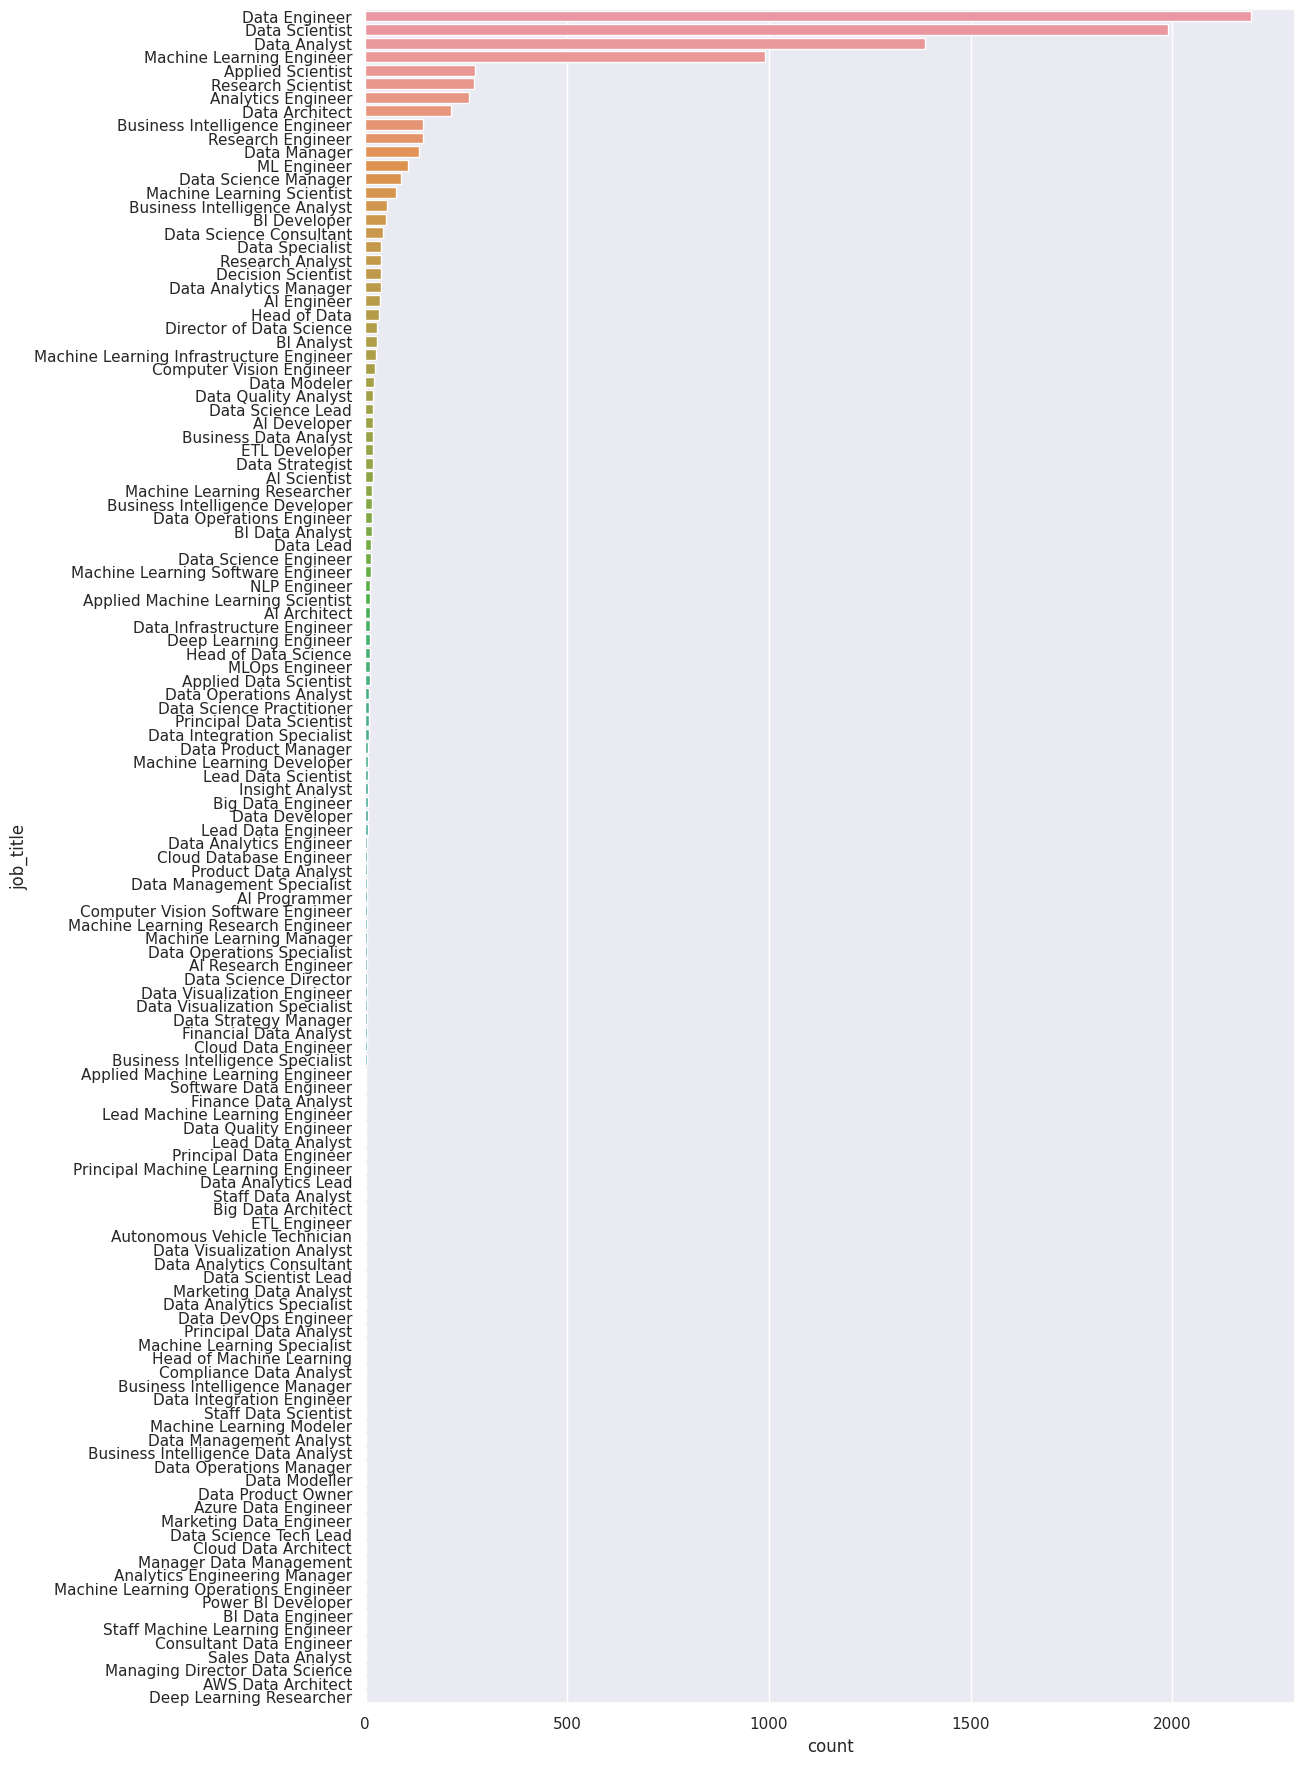

In [13]:
fig = plt.figure(figsize=(12,22))
g=sns.countplot(orient='h', data=df, y='job_title', order=df['job_title'].value_counts().index)
#To get the top 10 most common job titles

We can see that a majority of jobs falls into a small number of categories. In particular Data Engineer, Data Scientist, Data Analyst and Machine Learning Engineer stand out as being very popular. 

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


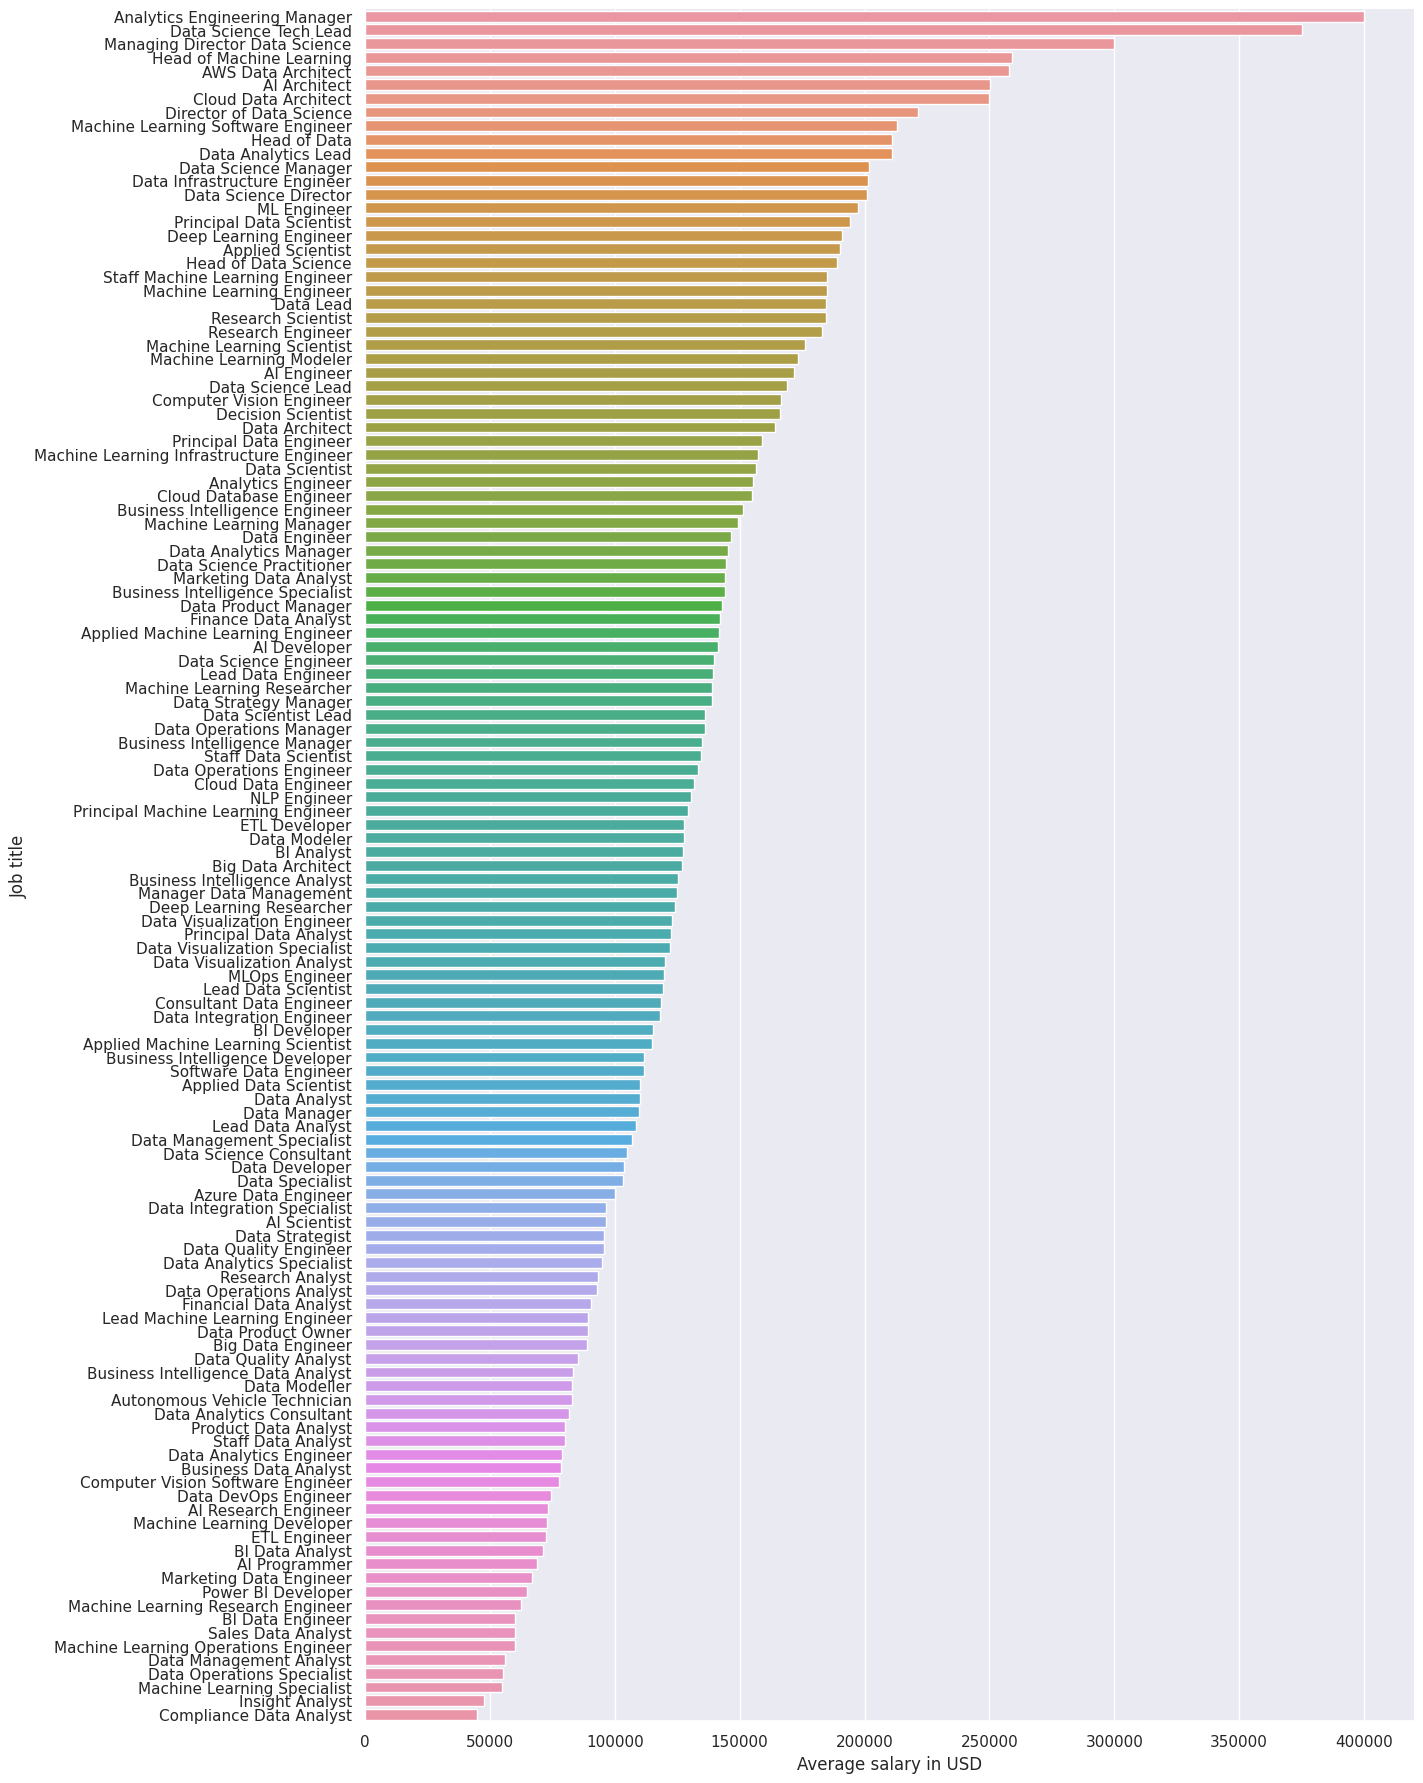

In [14]:
g= sns.catplot(x='salary_in_usd',y='job_title',data=df.groupby('job_title')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 18, aspect = 0.8, order=df.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Job title")

As expected, there is a significant difference in average salary between the first 2 job categories, Analytics Engineering Manager and Data Science Tech Lead and the average salaries for the other categories, the falloff is quite steep. These are leadership positions, so it is to be expected that the pay would be higher. The next 5 categories also show some high average price values. One is again a leadership position (Head of Machine Learning), the others are "architect" positions, namely jobs where one oversees the completion of large projects. The high salaries are, once again, to be expected.

In [15]:
df1 = df[df.job_title.isin(["Data Engineer","Data Scientist", "Data Analyst", "Machine Learning Engineer"])]

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


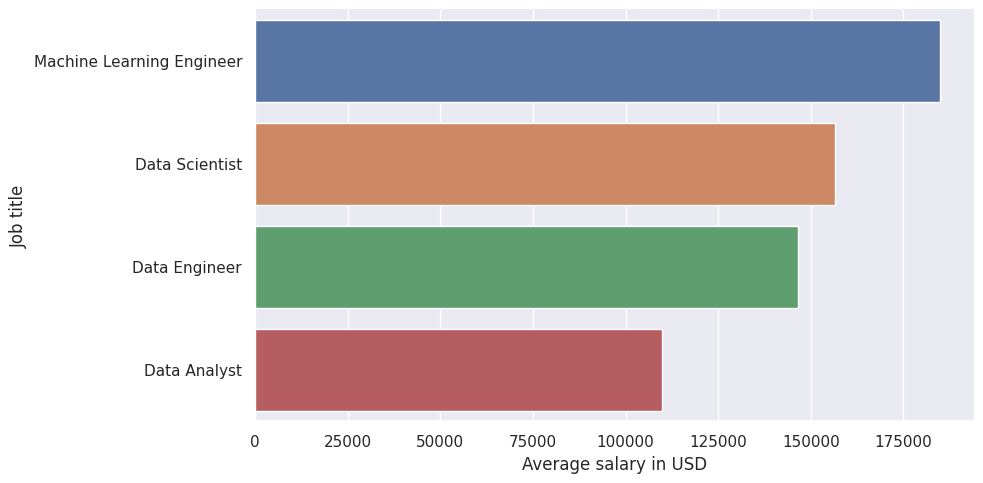

In [16]:
g= sns.catplot(x='salary_in_usd',y='job_title',data=df1.groupby('job_title')["salary_in_usd"].mean().reset_index(), kind = 'bar', aspect = 2.0, order=df1.groupby('job_title')["salary_in_usd"].mean().sort_values(ascending=False).index.values) 
g.set_axis_labels("Average salary in USD", "Job title")

Here we can see the average salaries for the 4 most popular jobs on the platform in the general Data Science sphere. The Machine Learning engineer is the highest paid position. This may well be due to the fact that Machine Learning engineers deal with rather complex algorithms and the process of training said algorithms on large data sets. This can be rather daunting work. 

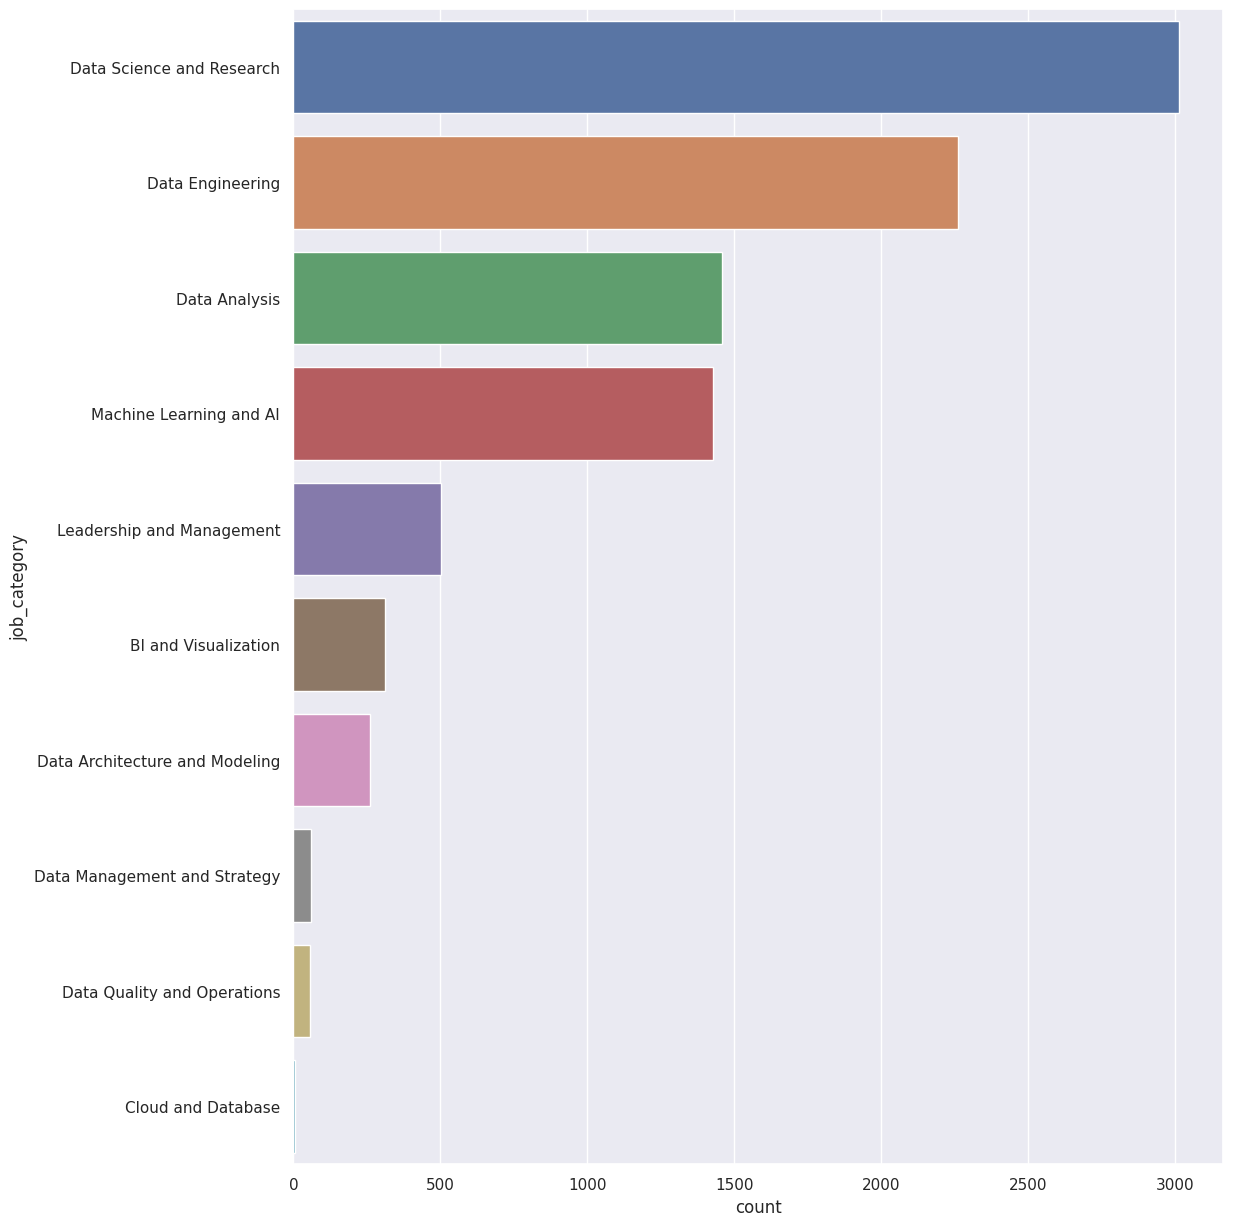

In [17]:
fig = plt.figure(figsize=(12,15))
g=sns.countplot(orient='h', data=df, y='job_category', order=df['job_category'].value_counts().index)
#To get the top 10 most common job titles

Here we can see which job categories are the most sought-after, in descending order. By far the most popular is Data Science and Reseasch, followed closely by Data Engineering. This makes sense, as many jobs labeled in the Data Science category actually include AI tasks, and Data Engineering is crucial in obtaining the large data sets that can then be used for training. Bad data can lead to faulty trained models. That can mean a lot of time and money wasted.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


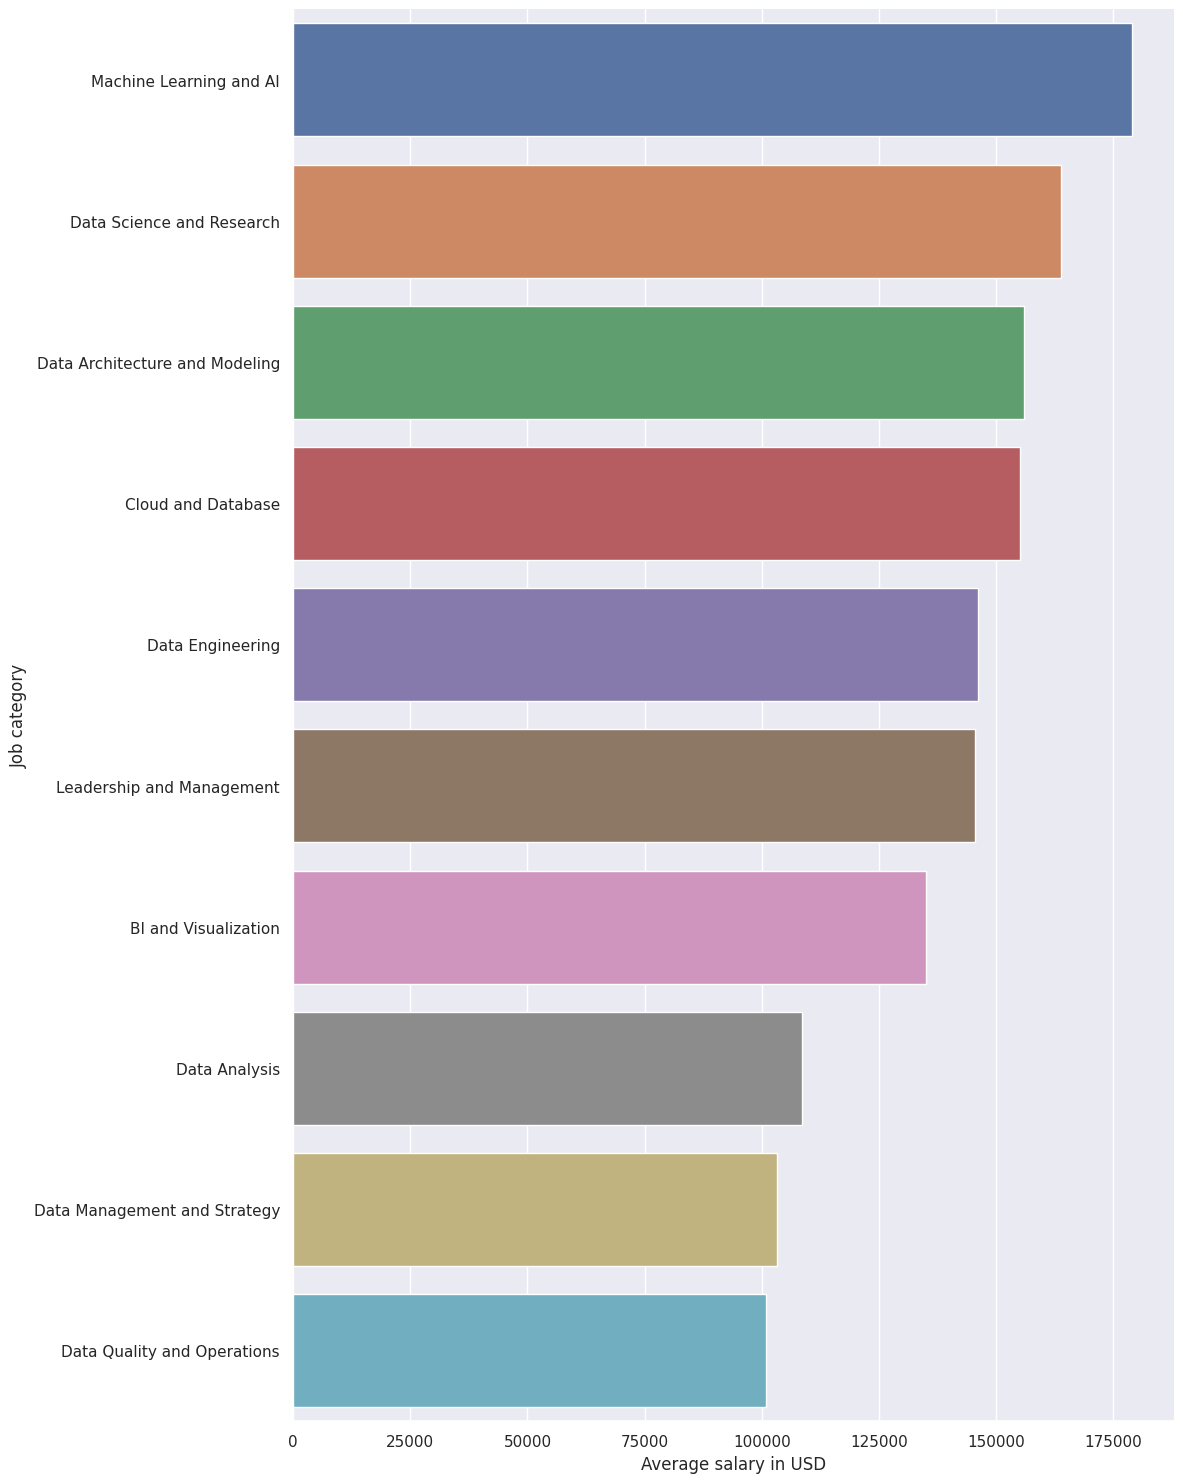

In [18]:
g= sns.catplot(x='salary_in_usd',y='job_category',data=df.groupby('job_category')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 15, aspect = 0.8, order=df.groupby('job_category')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Job category")

Here we can see the average salaries per job category. Not surprising is the fact that Machine Learning and AI is at the very top of the list, it is a very popular field nowadays, it is a booming industry and it will likely remain so for the following years, if not decades. Following closely behind is Data Science and Research, which is not surprising, there is a lot of overlap between these two categories. Many jobs labeled in the Data Science category have to do with AI. Interestingly, the next two categories, Data Architecture and Modeling and Cloud and Database are at almost the same average salary value. This indicates that while it's not quite the top priority, the ML OPS field is also extremely important in this industry. One can have the most beautiful and efficient algorithms and a very well set up dataset, but without the infrastructure to 1) train the model and 2) deploy it for clients to use, one is left with only a nice paper to publish, but not much else. And so the people with the knowledge and skills to set up the rather large infrastructure needed to deploy the bigger models out there are also highly sought after and quite well paid.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


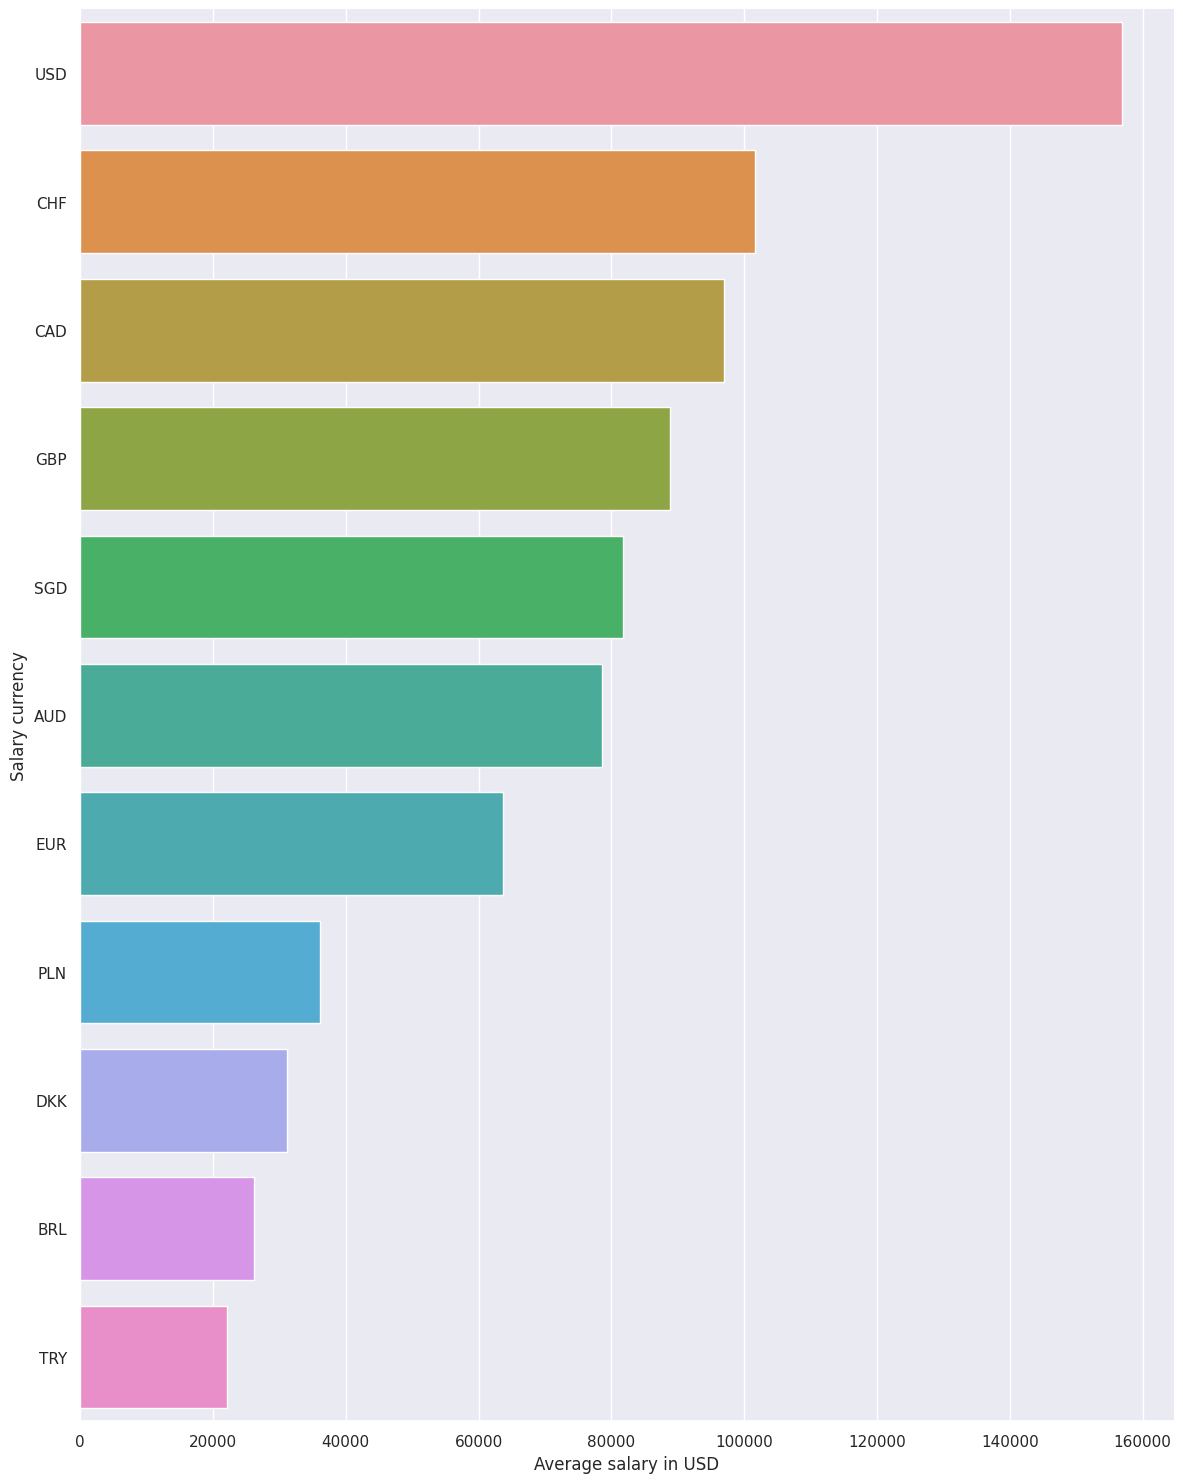

In [19]:
g= sns.catplot(x='salary_in_usd',y='salary_currency',data=df.groupby('salary_currency')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 15, aspect = 0.8, order=df.groupby('salary_currency')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Salary currency")

Here we can see the average salaries (converted to USD) grouped by the currency they are paid in. We can see that the highest average salary is paid in USD. This could lead one to believe that the highest salaries are paid in the US, but that is not quite the case, as we shall see later on. The next 2 currencies, at a significant distance are the Swiss frank and the Canadian dollar. The euro is in 7th place. This serves as an indicator of job market and living conditions in various countries. 

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


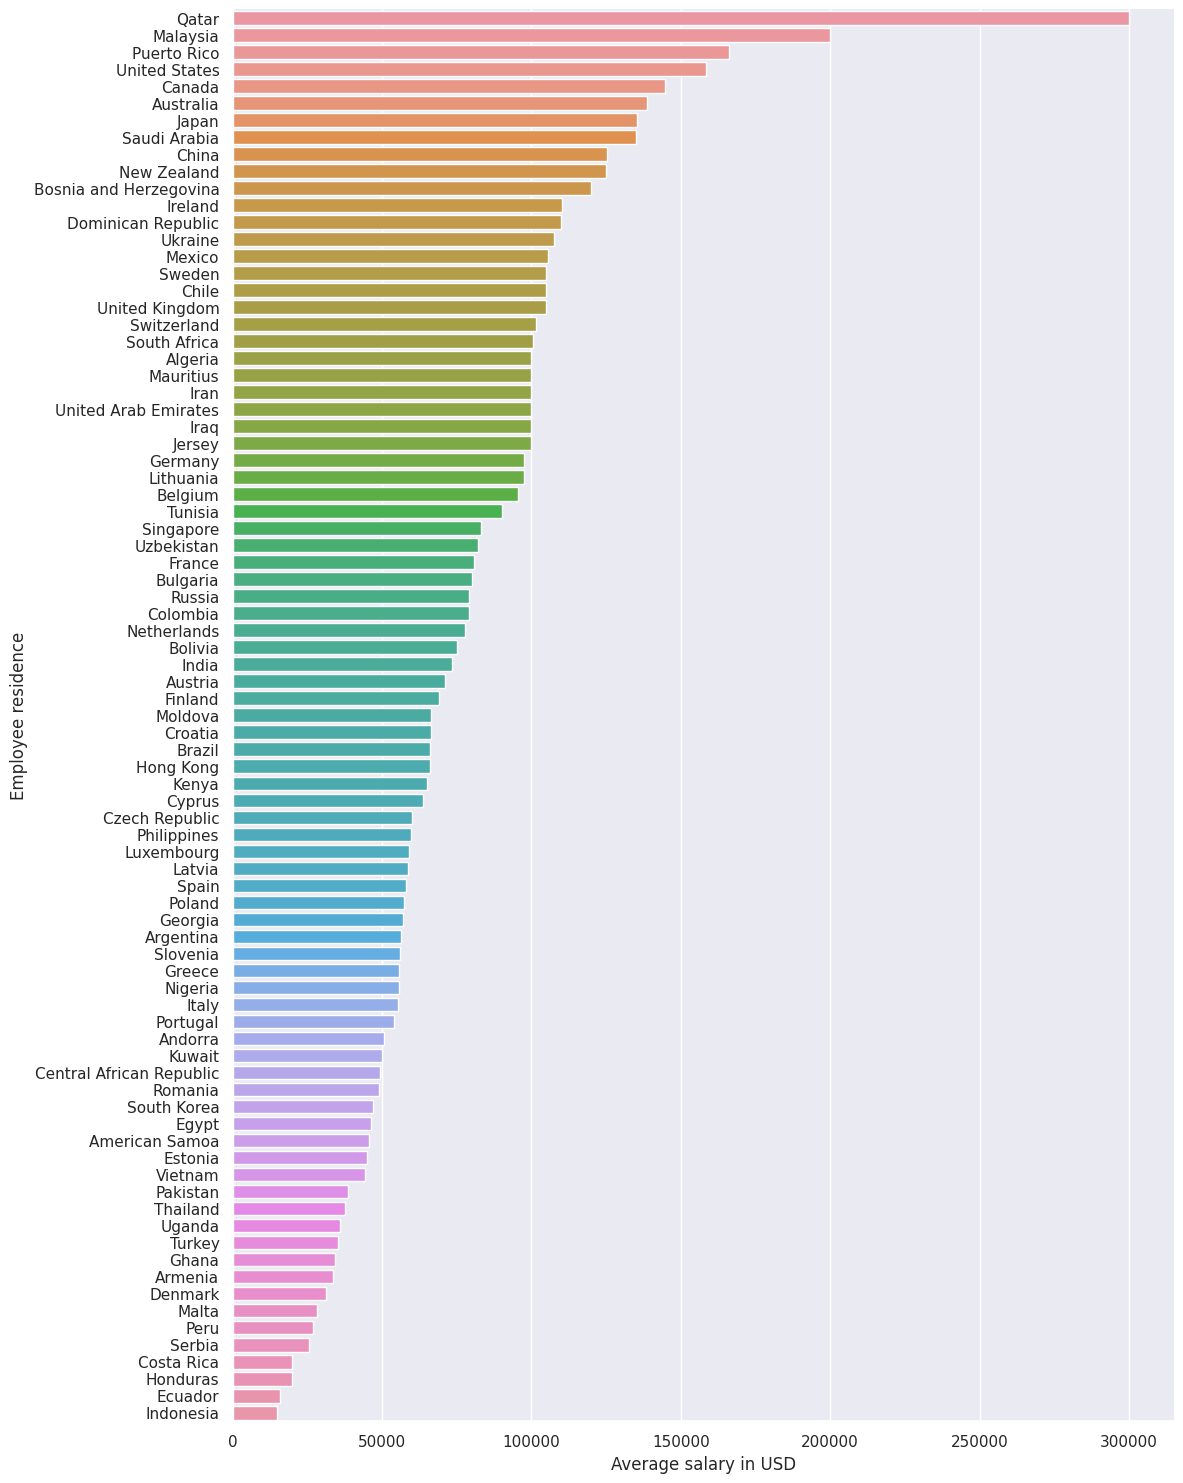

In [20]:
g= sns.catplot(x='salary_in_usd',y='employee_residence',data=df.groupby('employee_residence')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 15, aspect = 0.8, order=df.groupby('employee_residence')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Employee residence")

Here we can see the average salaries by employee residence. The highest salaries in the general Data Science/AI sphere are paid in Qatar, Malaysia and Puerto Rico. Countries that are generally considered very rich, such as the US, Canada, Japan, the UK and some western European countries are further down the list, which is quite surprising. This shows a serious demand for people specialized Data Science, Analytics, AI and so on in some Middle Eastern countries and emerging markets.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


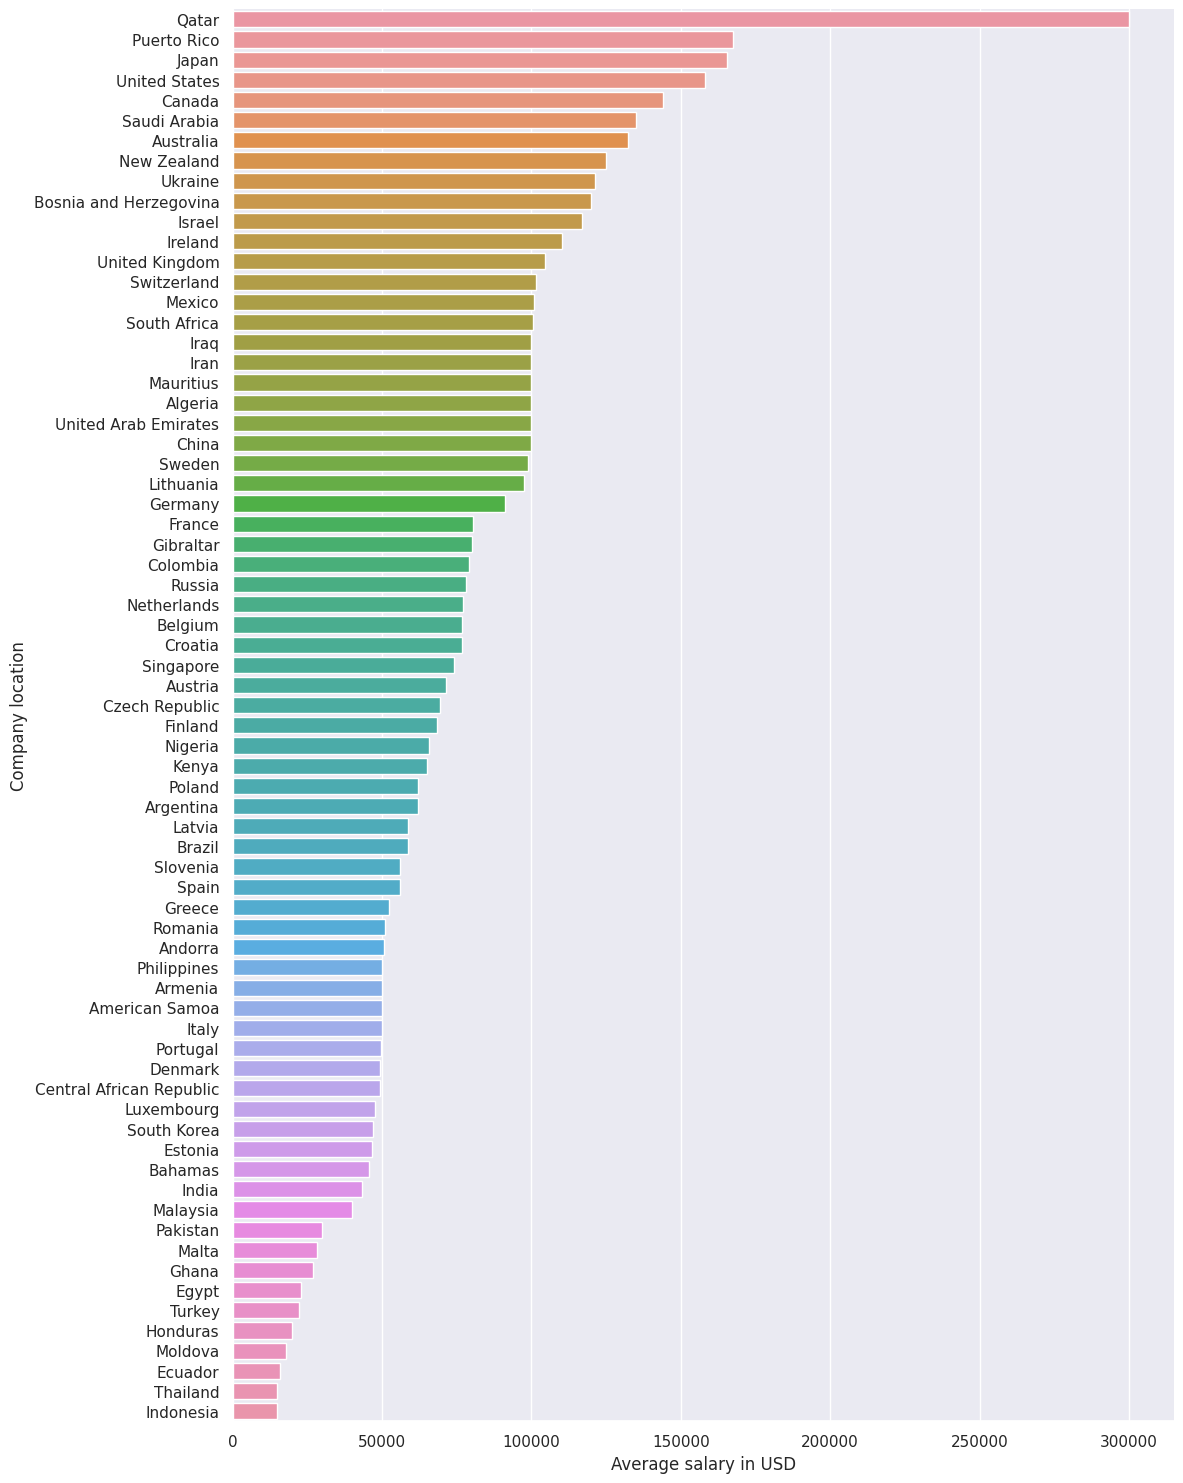

In [21]:
g= sns.catplot(x='salary_in_usd',y='company_location',data=df.groupby('company_location')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 15, aspect = 0.8, order=df.groupby('company_location')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Company location")

Here we can see average salaries grouped by company location. The results are similar, but there are some notable differences. Take for example Puerto Rico. It is second when grouping average salaries by company location, but third when grouping them by employee residence. Qatar is in first place in both cases, by a wide margin. Qatari companies pay very well and employees living in Qatar are paid very well. Here's where things get interesting. An employee residing in Malaysia will be paid very well, but, apparantly, not usually at a company based in Malaysia. Companies based in Malaysia are actually closer to the bottom of the list. Two factors should be taken into account here: 1) Large corporations with offices around the world. Those usually have a main office, an origin point of sorts in a certain country. And here we can see that US and Japanese countries are very high up in the list, as expected. 2) Working remotely has become quite popular since the pandemic. Many people and companies have realized that for certain types of jobs the employees need not be physically present at the office, they can do their work in front of their own personal computer at home. And this is true for jobs in the general Data Science/AI sphere. Even if one needs to train very large models, one can remotely access the hardware resources they need to get the job done. There are companies such as Google, Amazon, Paperspace and so on that essentially rent out the infrastructure necessary for training and/or running inference.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


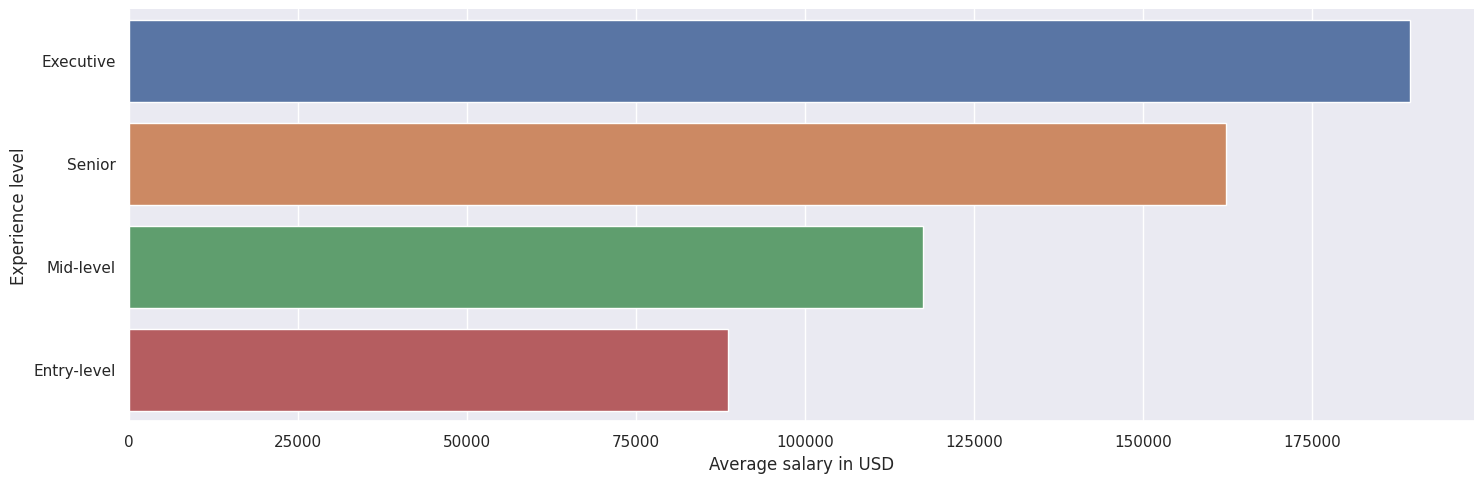

In [22]:
g= sns.catplot(x='salary_in_usd',y='experience_level',data=df.groupby('experience_level')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 5, aspect = 3, order=df.groupby('experience_level')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Experience level")

Here we have average salaries grouped by the experience level of the applicants. The order is not at all surprising, the lowest salaries correspond to entry-level jobs, while the highes paid ones correspond to executive positions.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


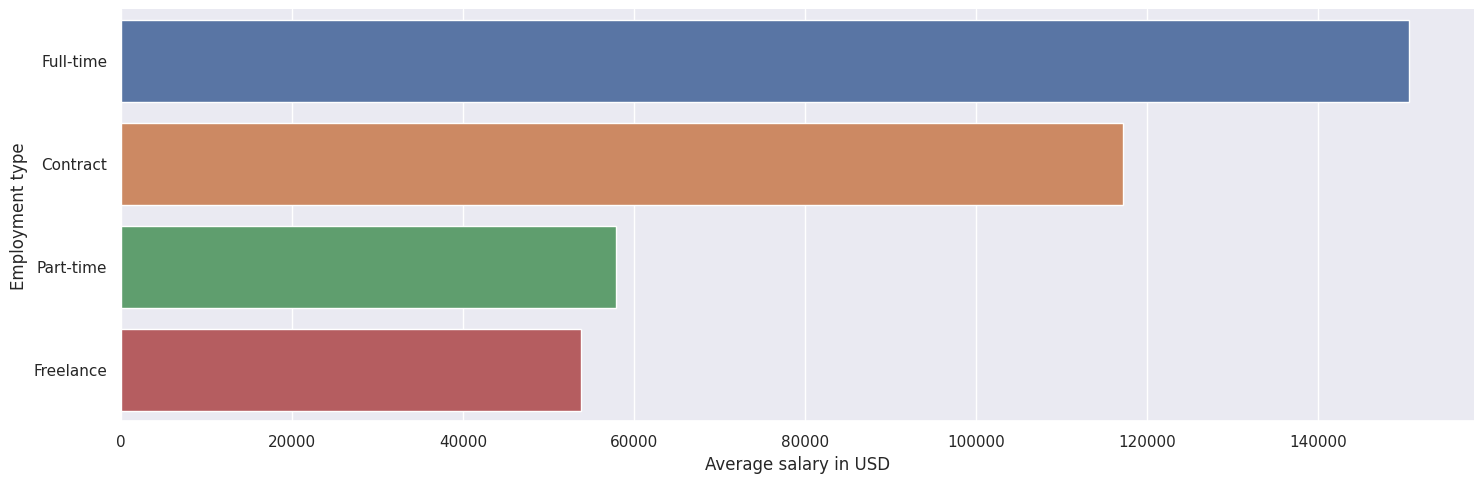

In [23]:
g= sns.catplot(x='salary_in_usd',y='employment_type',data=df.groupby('employment_type')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 5, aspect = 3, order=df.groupby('employment_type')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Employment type")

Here we have average salaries grouped by the types of employement. Once again the results are not surprising, full time positions are paid the highest, while part time and freelance positions correspond to the lower salaries.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


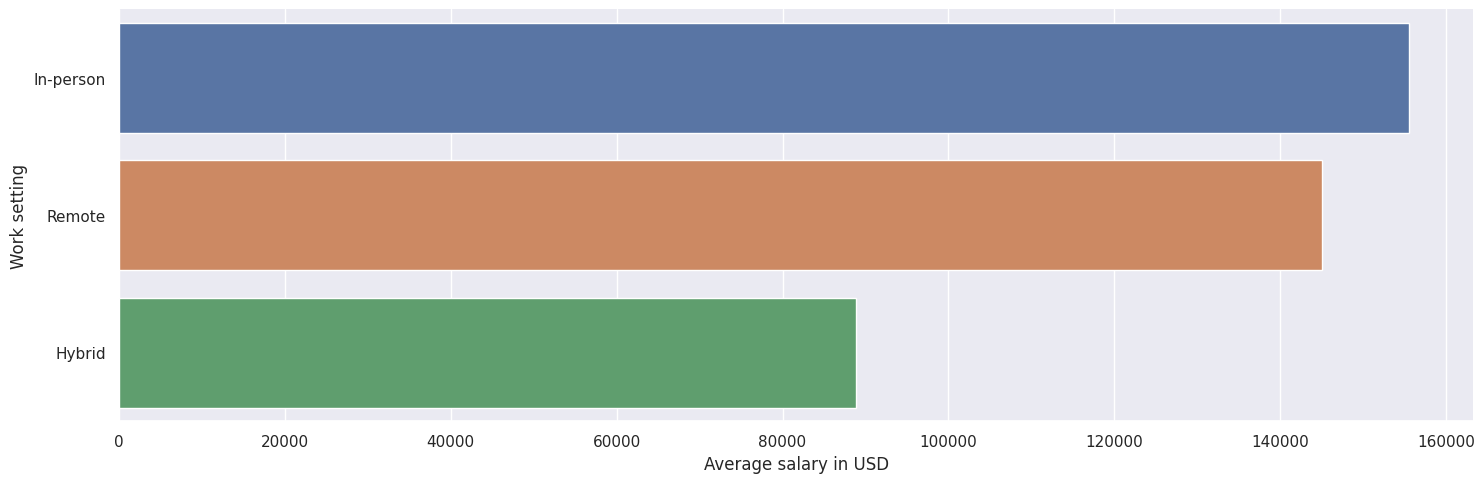

In [24]:
g= sns.catplot(x='salary_in_usd',y='work_setting',data=df.groupby('work_setting')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 5, aspect = 3, order=df.groupby('work_setting')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Work setting")

Here we have average salaries grouped by work setting. The results are somewhat surprising here. In-person jobs are paid the highest, although remote positions are not far behind. The surprising part is that jobs in a hybrid setting, so part in-person, part remote are paid much less on average than either remote or in-person jobs. This seems counter-intuitive. Perhaps time management becomes more problematic when mixing the two styles of work together? Unclear. This is a problem that deserves more in-depth study.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


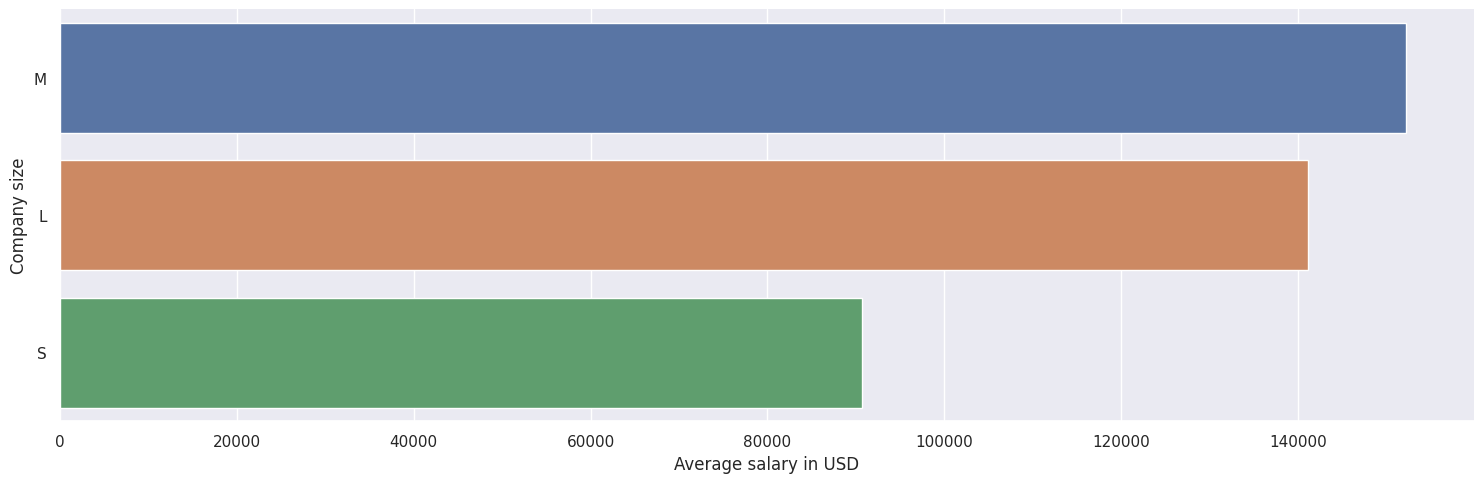

In [25]:
g= sns.catplot(x='salary_in_usd',y='company_size',data=df.groupby('company_size')["salary_in_usd"].mean().reset_index(), kind = 'bar', height = 5, aspect = 3, order=df.groupby('company_size')["salary_in_usd"].mean().sort_values(ascending=False).index.values)
g.set_axis_labels("Average salary in USD", "Company size")

Here we have average salaries grouped by company size. Not surprisingly small companies generally pay the lowest wages. What is surprising is that medium-sized companies tend to pay more large companies. This may show a tendency of medium companies to be more competitive and hungrier for growth, while large companies may feel more secure in the place they have on the market and the large number of applicants constantly vying for positions and thus feel that they can afford to cut some costs when it comes to employee wages. Interestingly the results shown in this graph are strikingly similar to the ones shown in the previous one, where salaries were grouped by work setting. Let's see if there's more to this.

In [26]:
df_med=df[df.company_size=='M']
df_lg=df[df.company_size=='L']
df_sl=df[df.company_size=='S']

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



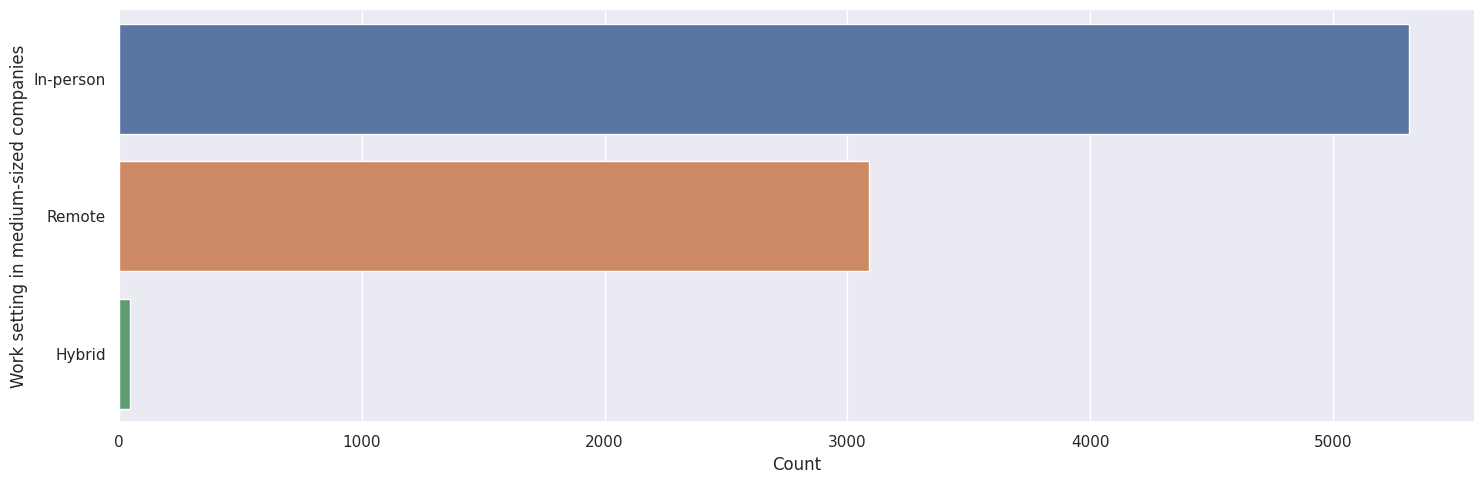

In [36]:
g= sns.catplot(y='work_setting',data=df_med, kind = 'count', order=['In-person','Remote','Hybrid'], height = 5, aspect = 3 )
g.set_axis_labels("Count", "Work setting in medium-sized companies")

As we can see, for medium-sized companies, the majority of positions are in a in-person setting. A significant number of positions are designated as remote. There are very, very few hybrid setting positions, almost irrelevant by comparison to the other two categories.

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



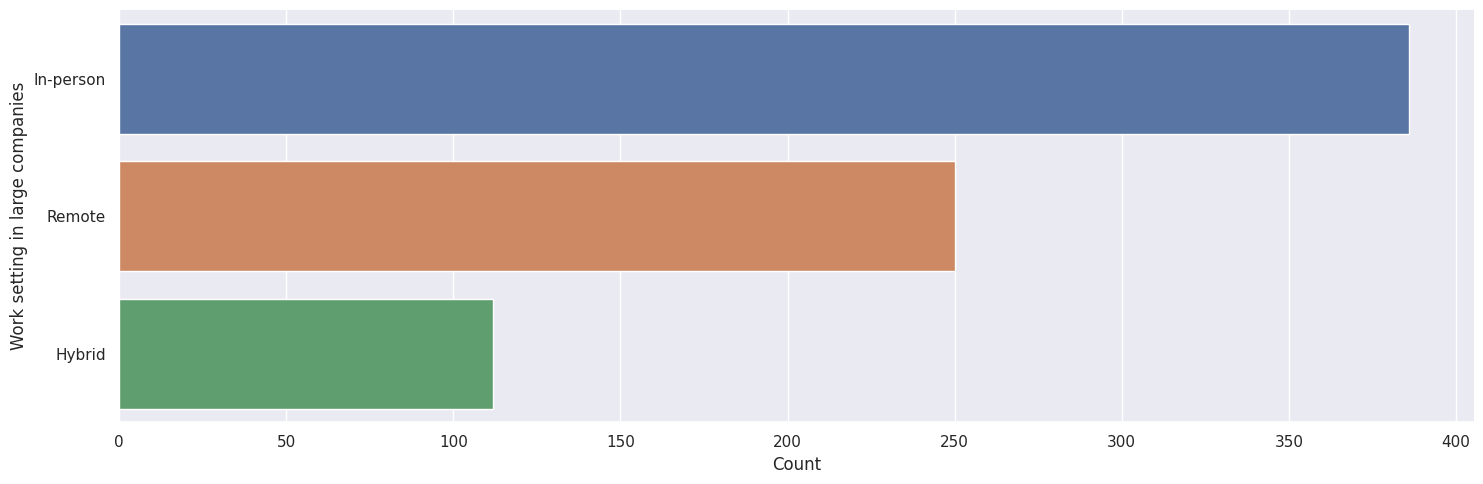

In [37]:
g= sns.catplot(y='work_setting',data=df_lg, kind = 'count', order=['In-person','Remote','Hybrid'], height = 5, aspect = 3 )
g.set_axis_labels("Count", "Work setting in large companies")

For large companies, the preferred type of position is for the in-person setting. There are a significant number of remote positions as well. Hybrid positions are the fewest in number but they do not represent an insignificant amount. 

/home/cata/Documents/git_stuff/python_venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



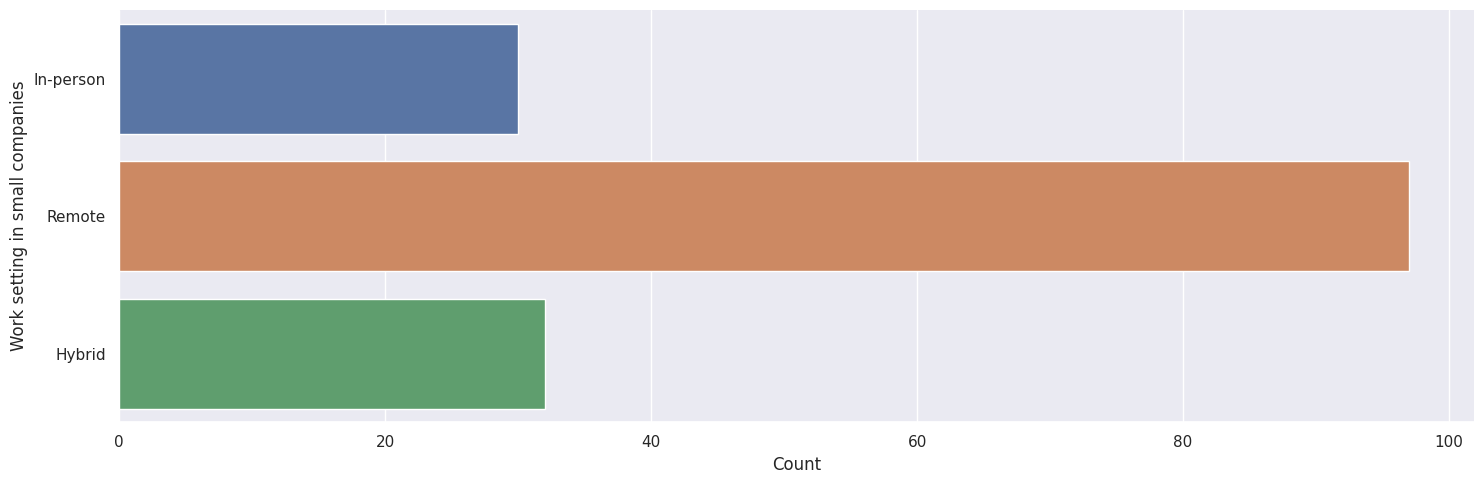

In [38]:
g= sns.catplot(y='work_setting',data=df_sl, kind = 'count', order=['In-person','Remote','Hybrid'], height = 5, aspect = 3 )
g.set_axis_labels("Count", "Work setting in small companies")

In the case of small companies remote positions are clearly preferred, and by a wide margin. Next are hybrid positions and lastly we have in-person positions.

Unfortunately we still do not have a clear indication as to why hybrid positions end up corresponding to the lowest wages on average, when compared to in-person and remote positions. What we have seen is that companies, regardless of size generally do not prefer the hybrid setting, but that alone does not necessarily explain the difference in wages. One possible explanation we have not considered before is that the costs incurred by the company when hiring someone for a hybrid position may be higher - that is, if the company has to provide a car AND a laptop for the employee, as opposed to either one or the other, then it would make sense for companies to prefer this type of work setting less and to offer lower pay for such positions.

Text(0.5, 1.0, 'correlation between continuous variables [Heat Map]')

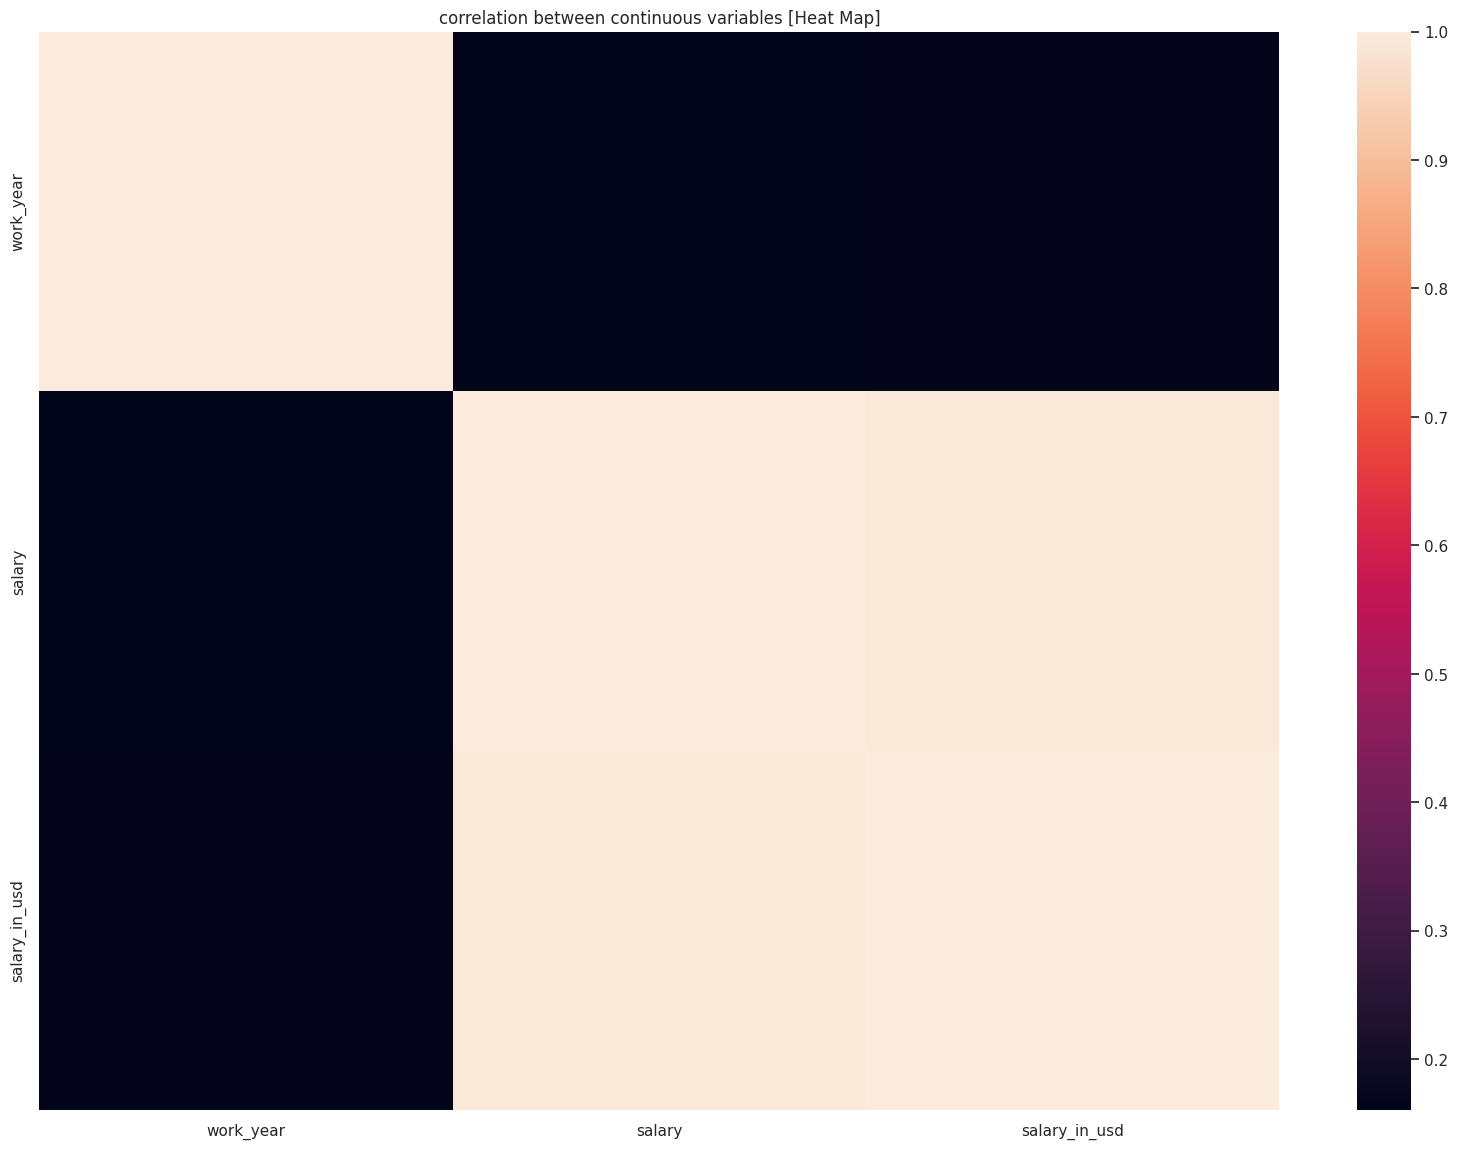

In [30]:
fig = plt.figure(figsize=(20,14))
g = sns.heatmap(df.corr(numeric_only=True));
g.set_title('correlation between continuous variables [Heat Map]')

Here we have a heatmap showing the correlations between the various numerical variables that we have in our data. As we can see there is almost no correlation between work_year and salary (whether expressed in USD or some other currency). We have seen in one of the first plots, average salary values have soared in 2022 and 2023, when compared to 2020 and 2021, a linear regression model would not perform well in that situation. Salary values expressed in various currencies and the same values converted in USD across the board are however well correlated. 

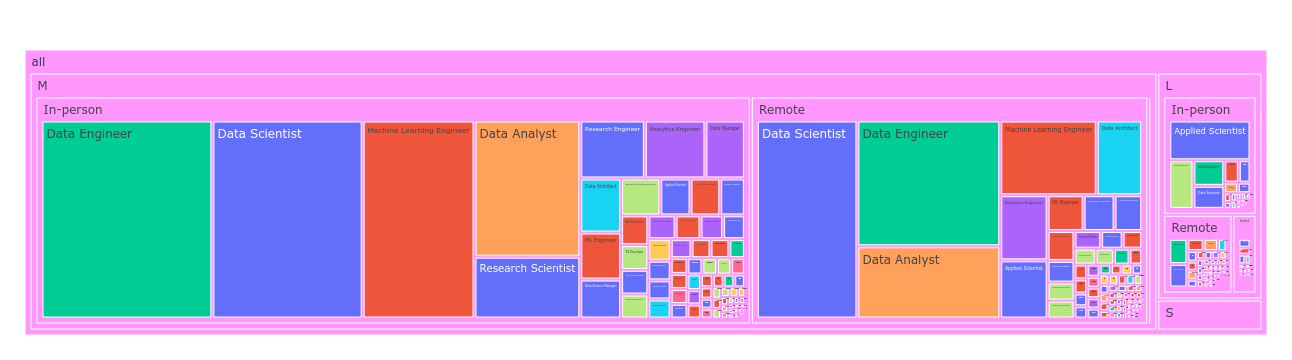

In [31]:
import plotly.express as px

fig = px.treemap(df, path=[px.Constant("all"), 'company_size', 'work_setting','job_title' ],
                  color='job_category', values='salary_in_usd',height=1000)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Here we have a treemap showing the following hierarchical structure: we start with the company size as the top-most category, within each company size we look at work settings, and for each work setting we look at the jobn titles corresponding to that work setting. The color of the rectangles coresponds to job category, while the size corresponds to salary expressed in USD (that is to say, total amount paid in that respective category or sub-category). 

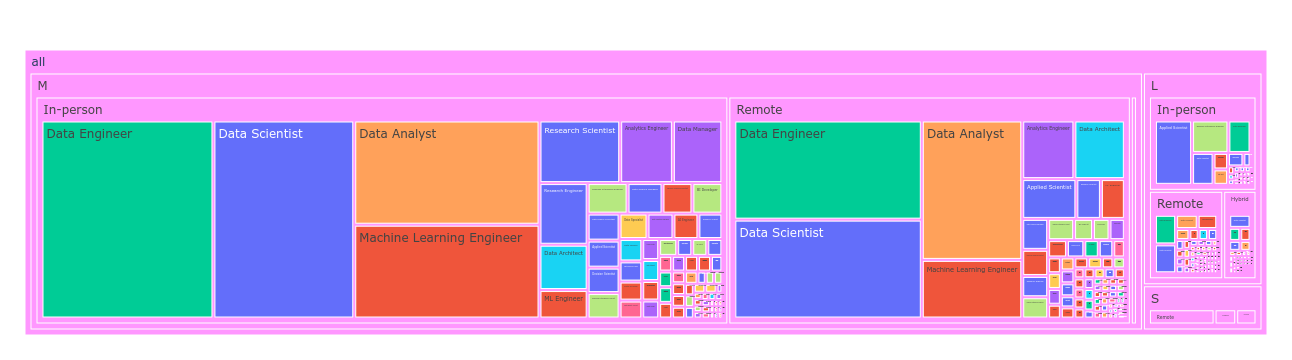

In [32]:
import plotly.express as px

fig = px.treemap(df, path=[px.Constant("all"), 'company_size', 'work_setting','job_title' ],
                  color='job_category',height=1000)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Here we have a treemap showing the same hierarchical structure as before with one key difference: the size of the rectangles is no longer given by salary, but the number of members in that category or sub-category.

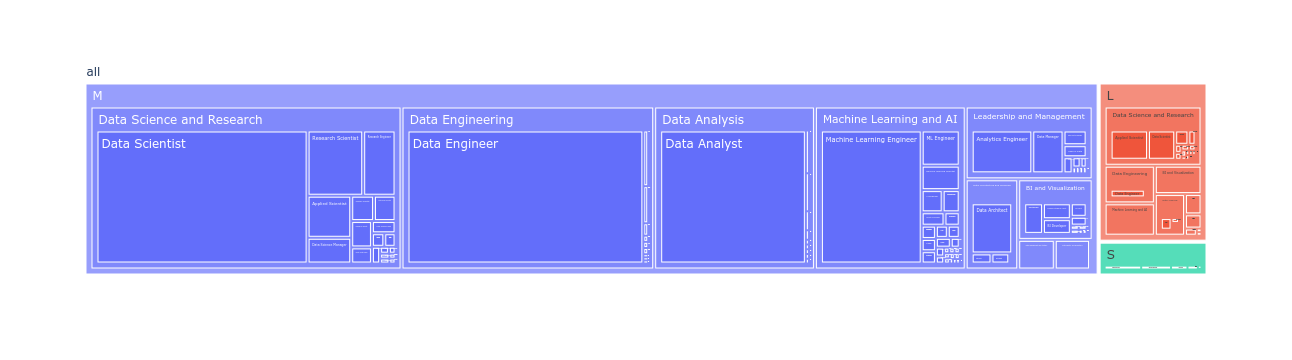

In [33]:
fig = px.treemap(df, path=[px.Constant("all"),'company_size', 'job_category', 'job_title'] ,height=1000)
fig.show()

Here we show a simpler hierarchical structure: the top-most category is company size, for each company size we look at job categories, and within each job category we look at job titles. Colors correspond to company size, while the size of the rectangles corresponds to the number of members within the respective category or sub-category.

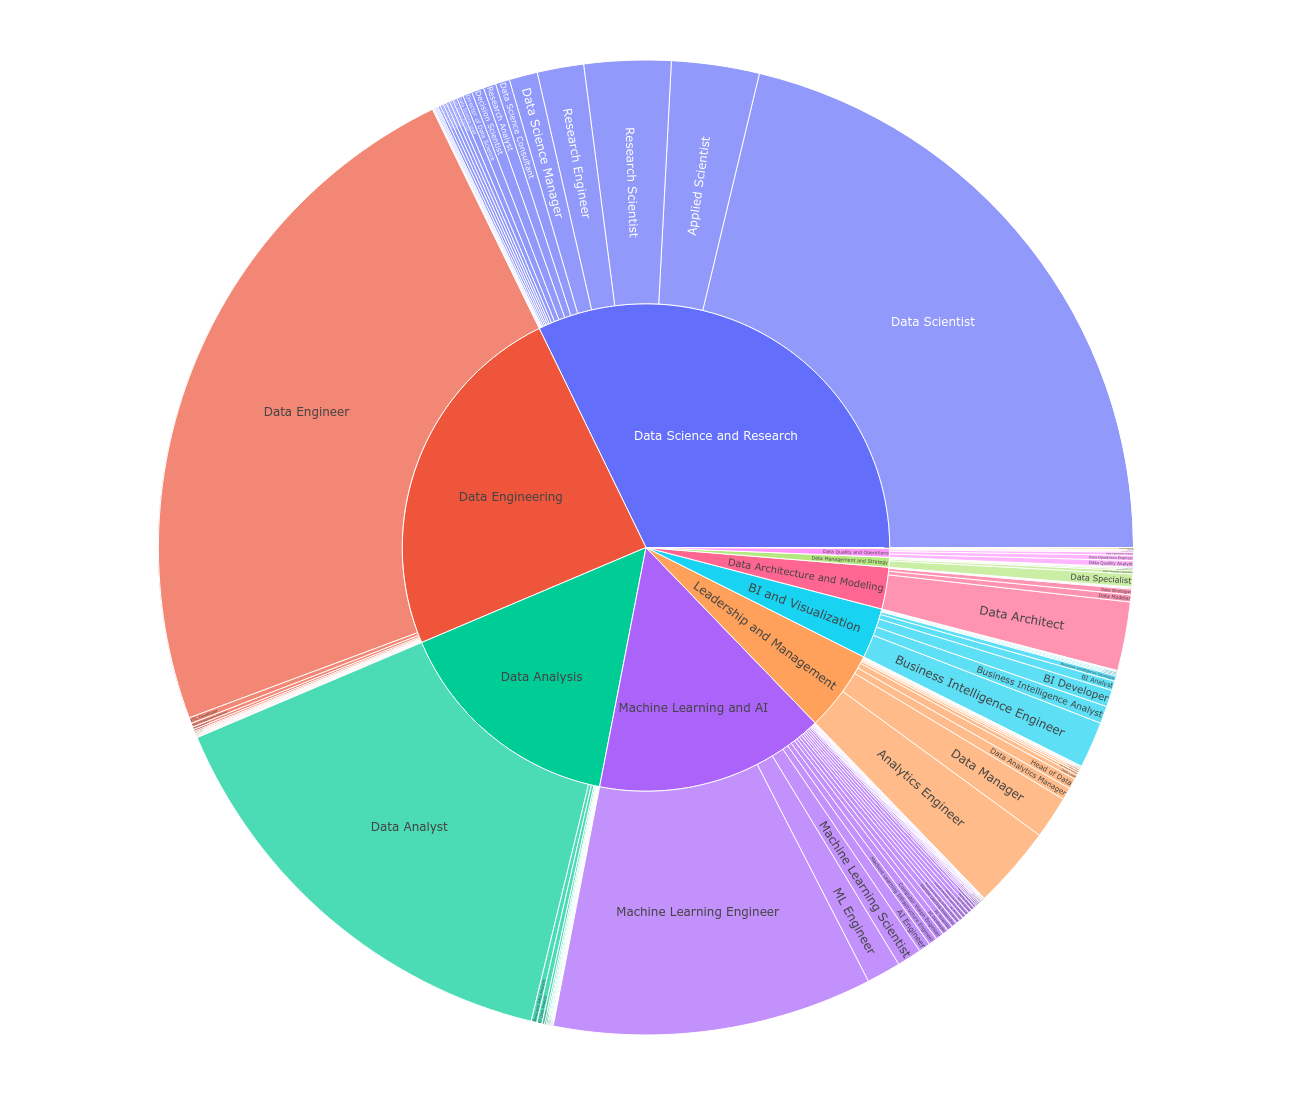

In [34]:
fig = px.sunburst(df, path=[ 'job_category', 'job_title'] ,width=1115, height=1115)
fig.show()

In this sunburst plot we show job categories and job titles corresponding to each category. The size of each disc sub-area corresponds to the number of members in that respective category or holding that respective job title.

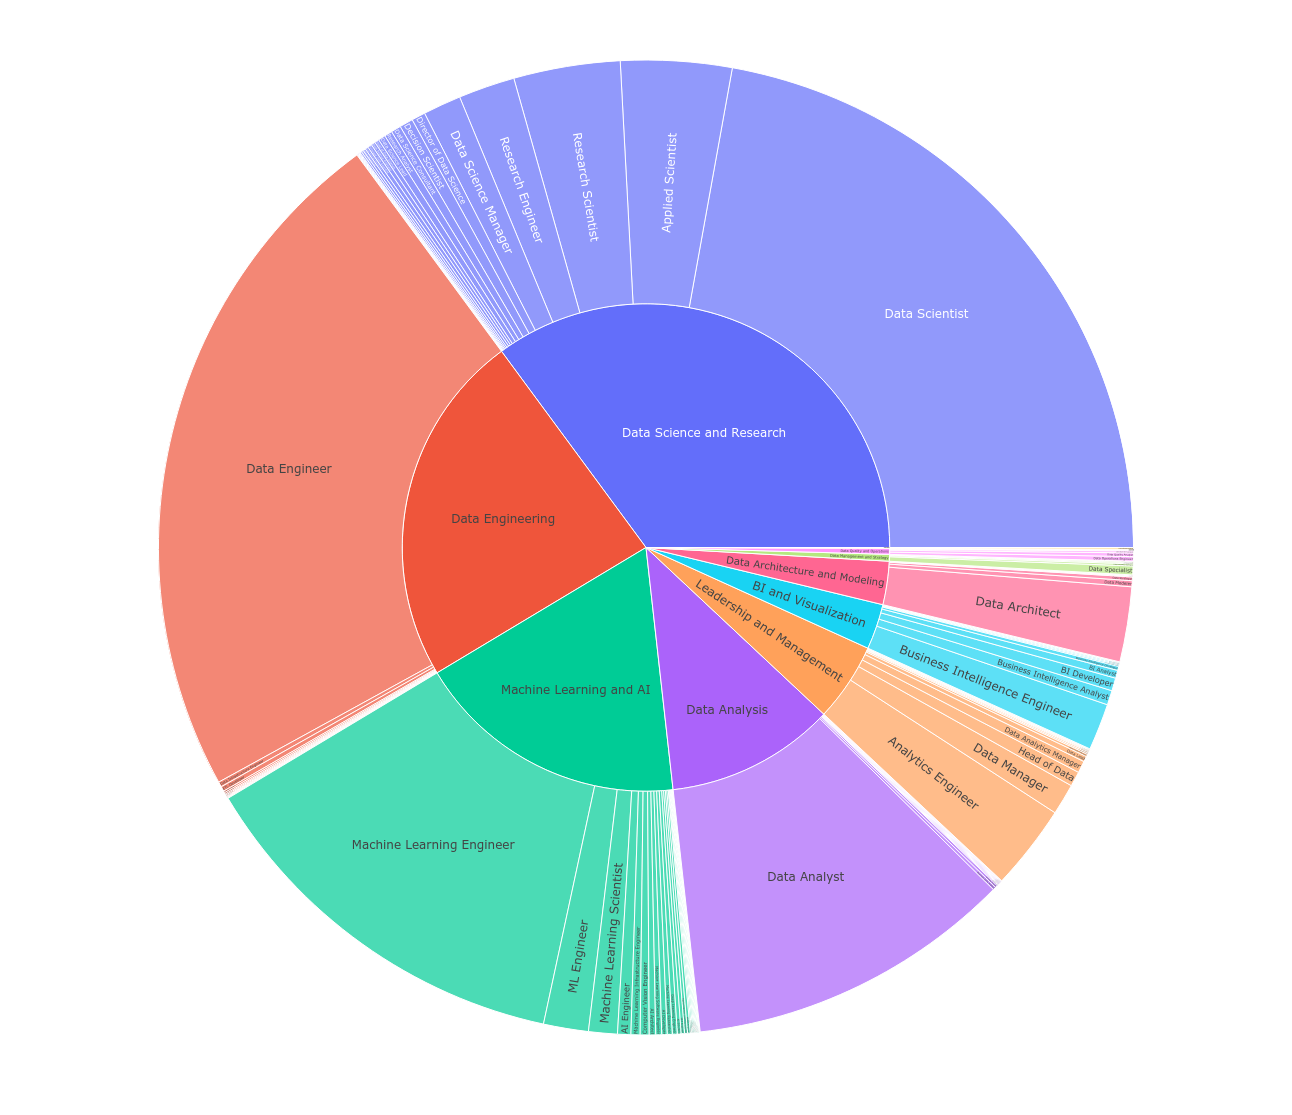

In [35]:
fig = px.sunburst(df, path=[ 'job_category', 'job_title'], values='salary_in_usd' ,width=1115,height=1115)
fig.show()

This sunburst plot shows the same hierarchical structure as the previous one, with one key difference: the size of each disc sub-area corresponds to the total amount paid in salaries for each respective category or job title.